In [179]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
%matplotlib inline
%config InlineBackend.figure_format='retina'
from IPython.display import clear_output
import imageio
from PIL import Image
import glob
from natsort import natsorted, ns
import shutil

### Import Paths 

In [9]:
paths = []
for file in os.listdir("./"):
    if file.startswith("path"):
        with open(file, 'rb') as file:
            paths.append(pickle.load(file))

### Helper Functions 

In [98]:
def find_diff(t1,t2):
    diffs = []
    for i in range(8):
        e1 = t1[i]
        e2 = t2[i]
        if e1 != e2:
            diffs.append(i)
    return diffs

def split_limbs(t):
    limbs = []
    temp = []
    for i in range(8):
        temp.append(t[i])
        if (i+1) % 2 == 0:
            limbs.append(temp)
            temp = []
    return limbs

def find_centroid(t):
    Xs = [t[2*i] for i in range(4)]
    Ys = [t[2*i+1] for i in range(4)]
    Xc = np.mean(Xs)
    Yc = np.mean(Ys)
    return (Xc,Yc)


def get_holds(wall):
    h = len(wall)
    X,Y = [],[]
    for i,w in enumerate(wall):
        j_holds = list(np.where(np.array(w) == 1)[0])
        X.extend(j_holds)
        Y.extend([i for _ in range(len(j_holds))])
    return X,Y

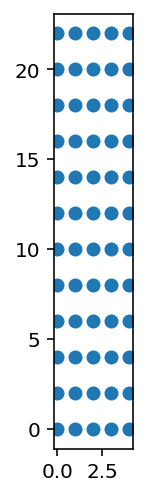

In [100]:
X,Y = get_holds(wall)
plt.scatter(X,Y)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [31]:
t1 = (1,2,3,4,5,6,7,8)
t2 = (1,2,4,4,5,6,7,8)
find_diff(t1,t2)

[2]

In [32]:
t1 = (1,2,3,4,5,6,7,8)
split_limbs(t1)

[[1, 2], [3, 4], [5, 6], [7, 8]]

In [48]:
find_centroid(t1)

(4.0, 5.0)

### Line for Body 

In [128]:
colors = ["red", "blue", "green", "orange"]

In [161]:
data = paths[1]
path = data["path"]
wall = data["wall"]
num_moves = len(path)

# Plot Holds
X,Y = get_holds(wall)
X_lim = max(X)
Y_lim = max(Y)

for i in range(1,num_moves-1):
    diff = find_diff(path[i], path[i+1])
    limb = diff[0] // 2
    
    t = path[i]
    center = find_centroid(t)
    figure(figsize=(8, 8), dpi=100)
    for l,c in zip(split_limbs(t), colors):
        plt.plot([center[1], l[1]], [center[0], l[0]], color=c,marker='.')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(X,Y,s=1,color='black')
    plt.xlim([-2,X_lim+2])
    plt.ylim([-2,Y_lim+2])
    plt.savefig(f"./anim/f{i}.jpg", dpi=300)
    plt.close()

In [170]:
def make_gif(frame_folder, name):
    frames = [Image.open(image) for image in natsorted(glob.glob(f"{frame_folder}/*.jpg"), key=lambda y: y.lower())]
    frame_one = frames[0]
    frame_one.save(name, format="GIF", append_images=frames,
               save_all=True, duration=500, loop=0)

### Make all Plots

In [181]:
for j,data in enumerate(paths):
    path = data["path"]
    wall = data["wall"]
    num_moves = len(path)

    # Plot Holds
    X,Y = get_holds(wall)
    X_lim = max(X)
    Y_lim = max(Y)
    
    # Set up Directories
    folder = f"./anim/P{j}/"
    try:
        shutil.rmtree(folder)
        os.mkdir(folder)
    except:
        print("Folder didn't exist, creating instead")
        os.mkdir(folder)

    for i in range(1,num_moves-1):
        diff = find_diff(path[i], path[i+1])
        limb = diff[0] // 2

        t = path[i]
        center = find_centroid(t)
        figure(figsize=(8, 8), dpi=100)
        for l,c in zip(split_limbs(t), colors):
            plt.plot([center[1], l[1]], [center[0], l[0]], color=c,marker='.')
        plt.gca().set_aspect('equal', adjustable='box')
        plt.scatter(X,Y,s=1,color='black')
        plt.xlim([-2,X_lim+2])
        plt.ylim([-2,Y_lim+2])
        plt.savefig(f"./anim/P{j}/f{i}.jpg", dpi=400)
        plt.close()
        
    base = f"./anim/P{j}"
    name = f"path{j}.gif"
    make_gif(base, name)

Folder didn't exist, creating instead
Folder didn't exist, creating instead
Folder didn't exist, creating instead
